In [20]:
pip install -r requirements.txt

  Cloning https://github.com/kmkurn/pytorch-crf.git (to revision 623e3402d00a2728e99d6e8486010d67c754267b) to /tmp/pip-install-9d6oipm_/pytorch-crf_f2f3f8b2a3474dad947611ac4c17d950
  Running command git clone --filter=blob:none --quiet https://github.com/kmkurn/pytorch-crf.git /tmp/pip-install-9d6oipm_/pytorch-crf_f2f3f8b2a3474dad947611ac4c17d950
  Running command git rev-parse -q --verify 'sha^623e3402d00a2728e99d6e8486010d67c754267b'
  Running command git fetch -q https://github.com/kmkurn/pytorch-crf.git 623e3402d00a2728e99d6e8486010d67c754267b
  Resolved https://github.com/kmkurn/pytorch-crf.git to commit 623e3402d00a2728e99d6e8486010d67c754267b
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached m

In [59]:

from transformers import BertTokenizerFast
import pandas as pd
from nltk.corpus import words
import nltk
from transformers import BertTokenizer
from nltk.corpus import words, wordnet
import ast


In [60]:
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [61]:
# Load English words from NLTK
nltk_words = set(words.words())

# Extract additional words from WordNet
wordnet_words = set(lemma.name().replace('_', ' ') for synset in wordnet.all_synsets() for lemma in synset.lemmas())

# Combine both word sets
english_vocab = nltk_words.union(wordnet_words)

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased", do_lower_case=True)

# Identify missing words
missing_words = [word for word in english_vocab if tokenizer.tokenize(word) == ['[UNK]']]

print(f"Total Missing Words: {len(missing_words)}")


Total Missing Words: 0


In [62]:

df = pd.read_csv("subsetOfDataSoftware.csv")


In [63]:
def combine_subwords(tokens):
    """
    Combines subword tokens marked with '##' into complete words.

    Args:
    tokens (list): List of tokenized words from a tokenizer.

    Returns:
    list: List of cleaned words without subword fragmentation.
    """
    combined_tokens = []
    current_word = ""

    for token in tokens:
        if token.startswith("##"):
            # Append to the previous word (removing the '##')
            current_word += token[2:]
        else:
            # Add the previous complete word to the list if it exists
            if current_word:
                combined_tokens.append(current_word)
            # Start a new word
            current_word = token

    # Append the last word
    if current_word:
        combined_tokens.append(current_word)

    return combined_tokens


In [64]:
tokenized_text = {
    "id": [],
    "sentence": [],
    "length": []
}



In [65]:

id = 0
for d in df['description'].values:
    combined_txt = combine_subwords(tokenizer.tokenize(d))
    tokenized_text['id'].append(id)
    tokenized_text['sentence'].append(combined_txt)
    tokenized_text['length'].append(len((combined_txt)))
    id+=1



Token indices sequence length is longer than the specified maximum sequence length for this model (812 > 512). Running this sequence through the model will result in indexing errors


In [66]:
df_dict = pd.DataFrame(tokenized_text)
df_dict

,id,sentence,length
0,0,"[education, bachelor, ', s, degree, in, software, ,, math, ,, or, science, required, job, skills, analytical, skills, ,, group, work, ,, knowledge, of, intended, audience, ,, understanding, of, different, roles]",30
1,1,"[job, description, :, goyt, is, seeking, a, skilled, and, motivated, remote, software, developer, specializing, in, php, to, join, our, dynamic, team, ., as, a, key, member, of, our, development, team, ,, you, will, play, a, crucial, role, in, iterating, and, enhancing, our, product, to, drive, the, growth, of, our, company, ., this, is, an, equity, -, based, role, ., responsibilities, :, develop, and, maintain, high, -, quality, php, code, for, our, web, -, based, application, ., collaborate, with, the, development, team, to, design, and, implement, new, features, and, enhancements, ., troubleshoot, and, debug, issues, to, ensure, optimal, performance, and, reliability, ...]",295
2,2,"[are, you, driven, by, the, thrill, of, solving, problems, and, offering, unparalleled, support, ?, do, you, thrive, in, environments, that, challenge, you, and, push, you, to, grow, ?, my, client, is, at, the, forefront, of, spectrum, engineering, and, management, ,, and, are, on, the, lookout, for, a, dynamic, software, support, specialist, to, join, their, team, ., if, you, are, goal, -, oriented, ,, crave, new, experiences, ,, and, are, ready, to, make, a, tangible, impact, ,, i, ', d, love, to, speak, with, you, ., duties, include, ,, but, are, not, limited, to, :, responsibilities, :, assist, users, in, designing, ...]",234
3,3,"[request, :, data, architectlocation, :, san, francisco, ,, ca, hybridduration, :, contract, job, description, :, aws, services, like, ec2, ,, s3, ,, lambda, ,, glue, ,, athena, ,, kinesis, datastreams, ,, kinesis, firehose, ,, etcetl, &, data, warehousing, concepts, with, hands, -, on, experience, sql, ,, redshift, ,, python, ,, spark, and, jsonapi, -, based, integration, and, security, cloud, computing, and, big, data, concepts, thanks, ,, sunil, ., k, @, saxonglobal, ., com]",73
4,4,"[this, opportunity, is, joining, an, innovation, driven, startup, that, has, built, the, first, 100, %, solar, +, battery, powered, datacenters, and, is, launching, a, dedicated, server, hosting, services, business, ., this, exciting, high, growth, firm, provides, a, ground, floor, opportunity, for, a, career, -, growth, minded, role, with, exciting, projects, with, leading, -, edge, technology, and, innovation, as, well, as, competitive, salaries, and, benefits, ., data, center, -, cloud, product, manager, -, revenue, officerwe, are, looking, for, an, experienced, cloud, product, manager, to, set, up, ,, manage, ,, market, and, maintain, a, vps, /, dedicated, bare, metal, hosting, service, in, ...]",252
...,...,...,...
4621,4621,"[we, ’, re, looking, for, people, who, put, their, innovation, to, work, to, advance, our, success, –, and, their, own, ., join, an, organization, that, ensures, a, more, secure, world, through, connecting, and, protecting, our, customers, with, inventive, electrical, solutions, ., what, you, will, experience, in, this, position, cis, global, by, nvent, is, a, leading, design, and, manufacturer, of, electromechanical, solutions, for, computer, data, center, and, consumer, appliance, industries, including, both, oem, and, branded, product, solutions, ., this, role, is, the, engineering, authority, for, the, multidisciplinary, design, of, pdu, products, data, center, applications, ., ideal, candidates, should, have, working, knowledge, ...]",735
4622,4622,"[role, title, :, data, engineering, lead, for, a, global, law, firm, location, :, new, york, ,, ny, (, hybrid, ), role, description, :, define, and, create, data, architectures, which, supports, the, requirements, of, the, business, ;, develop, custom, data, models, and, algorithms, to, apply, to, data, sets, ;, assess, the, effectiveness, and, accuracy, of, new, data, sources, and, data, gathering, techniques, dis

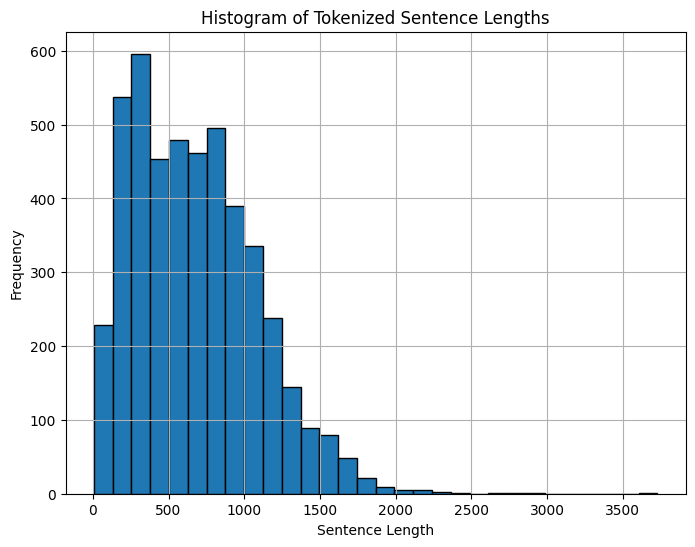

In [67]:
import matplotlib.pyplot as plt
lengths = df_dict['length']
plt.figure(figsize=(8, 6));
plt.hist(lengths, bins=30, edgecolor='black');
plt.title('Histogram of Tokenized Sentence Lengths');
plt.xlabel('Sentence Length');
plt.ylabel('Frequency');
plt.grid(True);
plt.show();


In [68]:
subset=df_dict[df_dict['length'] < 900]
subset

,id,sentence,length
0,0,"[education, bachelor, ', s, degree, in, software, ,, math, ,, or, science, required, job, skills, analytical, skills, ,, group, work, ,, knowledge, of, intended, audience, ,, understanding, of, different, roles]",30
1,1,"[job, description, :, goyt, is, seeking, a, skilled, and, motivated, remote, software, developer, specializing, in, php, to, join, our, dynamic, team, ., as, a, key, member, of, our, development, team, ,, you, will, play, a, crucial, role, in, iterating, and, enhancing, our, product, to, drive, the, growth, of, our, company, ., this, is, an, equity, -, based, role, ., responsibilities, :, develop, and, maintain, high, -, quality, php, code, for, our, web, -, based, application, ., collaborate, with, the, development, team, to, design, and, implement, new, features, and, enhancements, ., troubleshoot, and, debug, issues, to, ensure, optimal, performance, and, reliability, ...]",295
2,2,"[are, you, driven, by, the, thrill, of, solving, problems, and, offering, unparalleled, support, ?, do, you, thrive, in, environments, that, challenge, you, and, push, you, to, grow, ?, my, client, is, at, the, forefront, of, spectrum, engineering, and, management, ,, and, are, on, the, lookout, for, a, dynamic, software, support, specialist, to, join, their, team, ., if, you, are, goal, -, oriented, ,, crave, new, experiences, ,, and, are, ready, to, make, a, tangible, impact, ,, i, ', d, love, to, speak, with, you, ., duties, include, ,, but, are, not, limited, to, :, responsibilities, :, assist, users, in, designing, ...]",234
3,3,"[request, :, data, architectlocation, :, san, francisco, ,, ca, hybridduration, :, contract, job, description, :, aws, services, like, ec2, ,, s3, ,, lambda, ,, glue, ,, athena, ,, kinesis, datastreams, ,, kinesis, firehose, ,, etcetl, &, data, warehousing, concepts, with, hands, -, on, experience, sql, ,, redshift, ,, python, ,, spark, and, jsonapi, -, based, integration, and, security, cloud, computing, and, big, data, concepts, thanks, ,, sunil, ., k, @, saxonglobal, ., com]",73
4,4,"[this, opportunity, is, joining, an, innovation, driven, startup, that, has, built, the, first, 100, %, solar, +, battery, powered, datacenters, and, is, launching, a, dedicated, server, hosting, services, business, ., this, exciting, high, growth, firm, provides, a, ground, floor, opportunity, for, a, career, -, growth, minded, role, with, exciting, projects, with, leading, -, edge, technology, and, innovation, as, well, as, competitive, salaries, and, benefits, ., data, center, -, cloud, product, manager, -, revenue, officerwe, are, looking, for, an, experienced, cloud, product, manager, to, set, up, ,, manage, ,, market, and, maintain, a, vps, /, dedicated, bare, metal, hosting, service, in, ...]",252
...,...,...,...
4619,4619,"[about, this, featured, opportunity, we, are, looking, for, a, data, engineer, to, occupy, a, unique, role, at, the, intersection, of, technology, ,, marketing, ,, finance, ,, statistics, ,, data, mining, ,, and, social, science, ., you, will, help, provide, key, insight, into, customer, behavior, necessary, to, guide, the, evolution, of, business, strategy, ., we, are, looking, for, a, data, engineer, to, extract, ,, transform, ,, clean, and, load, financial, data, into, a, data, lake, and, make, it, available, to, software, and, business, intelligence, engineers, for, serving, finance, ,, leadership, ,, compliance, and, other, stakeholders, ., we, seek, candidates, who, are, ...]",559
4620,4620,"[exciting, long, -, term, and, fully, remote, opportunity, for, a, sql, software, engineer, an, industry, leading, company, in, the, fundraising, /, healthcare, sector, ., the, sql, software, engineer, will, be, responsible, for, sql, server, development, and, performance, tuning, ,, while, working, with, enterprise, etl, data, warehouse, environments, ., this, role, is, fully, remote, *, desired, experience, 5, +, years, of, sql, engineering, experience, strong, experien

In [69]:
max_length_row = subset[subset['length'] == subset['length'].max()]
max_length_row.iloc[0][0]

<ipython-input-69-043fc83a181d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_length_row.iloc[0][0]


543

In [70]:
subset[subset['length'] <= 200]

,id,sentence,length
0,0,"[education, bachelor, ', s, degree, in, software, ,, math, ,, or, science, required, job, skills, analytical, skills, ,, group, work, ,, knowledge, of, intended, audience, ,, understanding, of, different, roles]",30
3,3,"[request, :, data, architectlocation, :, san, francisco, ,, ca, hybridduration, :, contract, job, description, :, aws, services, like, ec2, ,, s3, ,, lambda, ,, glue, ,, athena, ,, kinesis, datastreams, ,, kinesis, firehose, ,, etcetl, &, data, warehousing, concepts, with, hands, -, on, experience, sql, ,, redshift, ,, python, ,, spark, and, jsonapi, -, based, integration, and, security, cloud, computing, and, big, data, concepts, thanks, ,, sunil, ., k, @, saxonglobal, ., com]",73
5,5,"[the, enterprise, data, infrastructure, and, analytics, manager, will, lead, a, team, of, talented, and, highly, motivated, engineers, to, strengthen, our, infrastructure, support, of, keybank, ’, s, data, and, analytics, program, ., this, individual, will, work, to, drive, out, stability, ,, build, a, talent, pipeline, ,, ensure, the, stability, and, security, of, our, enterprise, data, and, analytics, platforms, and, help, drive, modernization, of, our, overall, infrastructure, program, ., reach, out, for, more, details]",72
8,8,"[data, engineer, with, kafka, (, w2, only, ), [UNK], %, remote, min, 10, to12, +, strong, development, experience, neededvery, strong, experience, in, kafka, and, kafka, data, injection, strong, exp, in, working, with, api, ., strong, exp, in, python, with, aws, ., experience, with, informatica, iics, and, snowflake, ., expertise, in, snowflake, ', s, cloud, data, platform, ,, including, data, loading, ,, transformation, ,, and, querying, using, snowflake, sql, ., experience, with, sql, -, based, development, ,, optimization, ,, and, tuning, for, large, -, scale, data, processing, ., strong, understanding, of, dimensional, modeling, concepts, and, experience, in, designing, and, implementing, data, ...]",165
9,9,"[company, descriptionpb, built, is, a, residential, construction, and, developement, company, based, in, jupiter, ,, fl, ., with, over, 40, years, of, experience, ,, pb, built, has, built, over, 1, million, square, feet, of, commercial, /, retail, space, and, over, $, 200, million, in, residential, custom, luxury, homes, ., they, are, known, for, constructing, unique, and, distinctive, homes, using, exquisite, materials, in, some, of, florida, ', s, finest, communities, ., role, descriptionthis, is, a, full, -, time, on, -, site, role, for, a, receptionist, /, data, entry, position, at, pb, built, in, jupiter, ,, fl, ., as, a, receptionist, /, data, ...]",176
...,...,...,...
4508,4508,"[job, title, :, datebase, adminjob, location, :, columbus, ,, ohio, (, hybrid, ), job, type, :, contractclient, :, direct, usc, and, gc, onlylocals, to, ohio, /, willing, to, relocate, job, description, :, 16years, of, database, administrator, experience, is, needed, •, critical, production, support, for, db2, ,, sql, server, ,, teradata, applications, ., •, upgrade, db2, z, /, os, to, the, latest, supported, version, ., •, install, and, configure, always, on, ha, and, dr, with, multiple, nodes, on, the, windows, server, failover, clustering, ., •, coordinate, upgrade, activities, with, das, /, oit, ,, vendors, ,, and, application, development, ., •, conduct, ...]",191
4537,4537,"[company, descriptionstarpro, -, better, data, instantly, is, a, research, and, tracking, application, used, by, companies, that, invest, in, skilled, nursing, homes, ., the, application, helps, optimize, and, monitor, operational, performance, indicators, that, investors, correlate, to, strong, clinical, and, financial, performance, ., successful, nursing, home, operators, ,, key, management, leaders, ,, and, consultants, leverage, starpro, to, validate, a, path, toward, stable, returns, ., role, descriptionthis, is, a, full, -, time, remote, role, for, a, data, entry, clerk, at, starpro, ., the, data, entry,

In [71]:
subset[subset['id'] == 9].iloc[0][1]

<ipython-input-71-c1f5d1921be2>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  subset[subset['id'] == 9].iloc[0][1]


['company',
 'descriptionpb',
 'built',
 'is',
 'a',
 'residential',
 'construction',
 'and',
 'developement',
 'company',
 'based',
 'in',
 'jupiter',
 ',',
 'fl',
 '.',
 'with',
 'over',
 '40',
 'years',
 'of',
 'experience',
 ',',
 'pb',
 'built',
 'has',
 'built',
 'over',
 '1',
 'million',
 'square',
 'feet',
 'of',
 'commercial',
 '/',
 'retail',
 'space',
 'and',
 'over',
 '$',
 '200',
 'million',
 'in',
 'residential',
 'custom',
 'luxury',
 'homes',
 '.',
 'they',
 'are',
 'known',
 'for',
 'constructing',
 'unique',
 'and',
 'distinctive',
 'homes',
 'using',
 'exquisite',
 'materials',
 'in',
 'some',
 'of',
 'florida',
 "'",
 's',
 'finest',
 'communities',
 '.',
 'role',
 'descriptionthis',
 'is',
 'a',
 'full',
 '-',
 'time',
 'on',
 '-',
 'site',
 'role',
 'for',
 'a',
 'receptionist',
 '/',
 'data',
 'entry',
 'position',
 'at',
 'pb',
 'built',
 'in',
 'jupiter',
 ',',
 'fl',
 '.',
 'as',
 'a',
 'receptionist',
 '/',
 'data',
 'entry',
 ',',
 'you',
 'will',
 'be',
 'r

In [74]:
import os
from langchain_mistralai import ChatMistralAI
from langchain_core.prompts import PromptTemplate

def set_api_key_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            api_key = file.read().strip()
            print(api_key)
            os.environ["3ibWLip2J8DbjPp4kkFznctnIPjsNex4"] = api_key
            print("Mistral API Key set successfully.")
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File '{file_path}' not found.")
    except Exception as e:
        raise Exception(f"An error occurred: {e}")

# Set API key using the file
api_key_path = "mistral_key.txt"
set_api_key_from_file(api_key_path)

# Initialize MistralAI with LangChain
llm = ChatMistralAI(model_name="mistral-large-latest", temperature=0.7)

# Read the prompt template from the file
with open("prompt.txt") as f:
    template = f.read()

# Define the prompt using LangChain
prompt_template = PromptTemplate.from_template(template)


3ibWLip2J8DbjPp4kkFznctnIPjsNex4
Mistral API Key set successfully.


In [75]:
import os
import requests
import json

def set_api_key_from_file(file_path):
    try:
        with open(file_path, 'r') as file:
            api_key = file.read().strip()
            os.environ["MISTRAL_API_KEY"] = api_key
            print("Mistral API Key set successfully.")
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: File '{file_path}' not found.")
    except Exception as e:
        raise Exception(f"An error occurred: {e}")

# Set API key
api_key_path = "mistral_key.txt"
set_api_key_from_file(api_key_path)

# Load prompt template from file
with open("prompt.txt", "r") as f:
    template = f.read()

# Direct call to Mistral API
def get_mistral_response(user_input, model="mistral-large-latest", temperature=0.7):
    api_key = os.environ["MISTRAL_API_KEY"]
    url = "https://api.mistral.ai/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json"
    }

    # Format the prompt
    prompt = template.format(job_description=user_input)

    payload = {
        "model": model,
        "temperature": temperature,
        "messages": [
            {"role": "user", "content": prompt}
        ]
    }

    response = requests.post(url, headers=headers, data=json.dumps(payload))

    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        raise Exception(f"Error: {response.status_code} - {response.text}")


Mistral API Key set successfully.


In [76]:
from tqdm import tqdm
import pandas as pd

# Take the first 25 rows of the DataFrame
subset100_ = subset[1200:1300].copy()  # .copy() avoids SettingWithCopyWarning

result = []

# Loop with progress bar
for job_description in tqdm(subset100_['sentence'], desc="Processing job descriptions"):
    try:
        response = get_mistral_response(job_description)  # from the earlier function
        result.append(response)
    except Exception as e:
        print(f"❌ Error: {e}")
        result.append("ERROR")

# Assign results to a new column
subset100_['result'] = result

Processing job descriptions:   1%|          | 1/100 [00:00<00:33,  2.97it/s]

❌ Error: Error: 429 - {"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}


Processing job descriptions:   2%|▏         | 2/100 [00:00<00:29,  3.37it/s]

❌ Error: Error: 429 - {"message":"Requests rate limit exceeded"}


Processing job descriptions:  16%|█▌        | 16/100 [14:17<1:05:10, 46.55s/it]

❌ Error: Error: 429 - {"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}


Processing job descriptions:  17%|█▋        | 17/100 [14:17<45:08, 32.63s/it]  

❌ Error: Error: 429 - {"message":"Requests rate limit exceeded"}


Processing job descriptions:  36%|███▌      | 36/100 [29:19<36:19, 34.06s/it]

❌ Error: Error: 429 - {"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}


Processing job descriptions:  44%|████▍     | 44/100 [34:17<30:13, 32.38s/it]

❌ Error: Error: 429 - {"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}


Processing job descriptions:  55%|█████▌    | 55/100 [44:38<40:49, 54.43s/it]

❌ Error: Error: 429 - {"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}


Processing job descriptions:  56%|█████▌    | 56/100 [44:38<27:59, 38.18s/it]

❌ Error: Error: 429 - {"message":"Requests rate limit exceeded"}


Processing job descriptions:  67%|██████▋   | 67/100 [55:17<39:37, 72.03s/it] 

❌ Error: Error: 429 - {"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}


Processing job descriptions:  72%|███████▏  | 72/100 [59:43<24:09, 51.75s/it]

❌ Error: Error: 429 - {"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}


Processing job descriptions:  82%|████████▏ | 82/100 [1:08:15<08:29, 28.31s/it]

❌ Error: Error: 429 - {"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}


Processing job descriptions:  99%|█████████▉| 99/100 [1:17:48<00:28, 28.65s/it]

❌ Error: Error: 429 - {"object":"error","message":"Service tier capacity exceeded for this model.","type":"invalid_request_error","param":null,"code":null}


Processing job descriptions: 100%|██████████| 100/100 [1:21:52<00:00, 49.12s/it]


In [77]:
subset100_['result']=result
subset100_.to_csv('subset_1200_to_1300_.csv')

📊 Entity Distribution (Only Valid Tags, excluding 'O'):
EDU: 8325
HSK: 103902
ORG: 16060
LOC: 6844
JOB: 11389
YOE: 8271


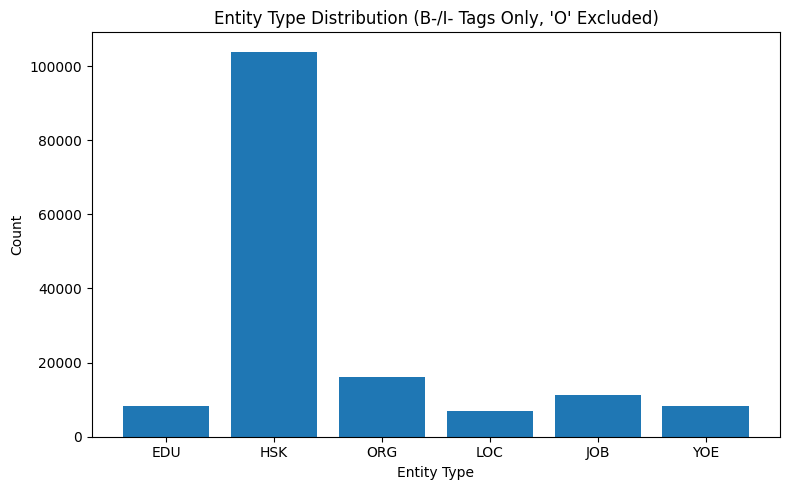

In [23]:
import pandas as pd
import ast
from collections import Counter
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Final Processed Dataset.csv")
df["parsed_list"] = df["parsed_list"].apply(ast.literal_eval)

# Define valid tags
valid_tags = {
    "B-HSK", "I-HSK", "B-JOB", "I-JOB", "B-YOE", "I-YOE",
    "B-ORG", "I-ORG", "B-LOC", "I-LOC", "B-EDU", "I-EDU", "O"
}

# Parse and clean parsed_list
data = [
    [(token[0], token[1]) for token in row if isinstance(token, (list, tuple)) and len(token) >= 2]
    for row in df['parsed_list']
]

# Flatten and filter valid tags
all_tags = [label for sentence in data for (_, label) in sentence if label in valid_tags]

# === Plot 1: Just Entity Types (O excluded, strip B-/I- prefixes) ===
entity_types = [tag.split("-")[1] for tag in all_tags if tag != "O"]
entity_counts = Counter(entity_types)

print("📊 Entity Distribution (Only Valid Tags, excluding 'O'):")
for entity, count in entity_counts.items():
    print(f"{entity}: {count}")

plt.figure(figsize=(8, 5))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title("Entity Type Distribution (B-/I- Tags Only, 'O' Excluded)")
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


📊 Full Tag Distribution (Including 'O'):
B-EDU: 2081
I-EDU: 6244
B-HSK: 54131
O: 808042
B-ORG: 8875
B-LOC: 4597
B-JOB: 4296
I-JOB: 7093
I-HSK: 49771
I-ORG: 7185
B-YOE: 2789
I-YOE: 5482
I-LOC: 2247


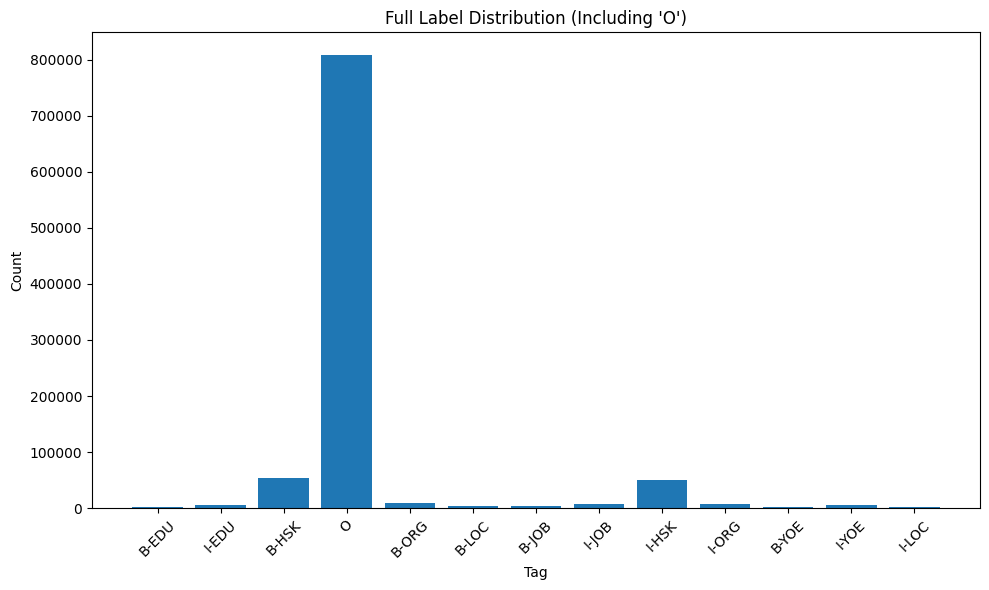

In [24]:
# === Plot 2: Full Tag Distribution Including 'O' ===
tag_counts_full = Counter(all_tags)

print("\n📊 Full Tag Distribution (Including 'O'):")
for tag, count in tag_counts_full.items():
    print(f"{tag}: {count}")

plt.figure(figsize=(10, 6))
plt.bar(tag_counts_full.keys(), tag_counts_full.values())
plt.title("Full Label Distribution (Including 'O')")
plt.xlabel("Tag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
bad_tags = [tag for tag in all_tags if tag != "O" and ("-" not in tag or len(tag.split("-")) != 2)]
print("⚠️ Malformed tags found:", set(bad_tags))


⚠️ Malformed tags found: set()


In [26]:
# Identify rows with invalid tags and their positions
invalid_info = []

for idx, row in df.iterrows():
    parsed = row["parsed_list"]
    invalid_indices = []
    try:
        for i, token in enumerate(parsed):
            if isinstance(token, (list, tuple)) and len(token) >= 2:
                if token[1] not in valid_tags:
                    invalid_indices.append((i, token[0], token[1]))
    except Exception:
        invalid_indices.append(("error_parsing", None, None))

    if invalid_indices:
        invalid_info.append({
            "index": idx,
            "sentence": row["sentence"],
            "parsed_list": parsed,
            "invalid_positions": invalid_indices
        })

# Convert to DataFrame
invalid_df = pd.DataFrame(invalid_info)

# Display
print(f"🧪 Found {len(invalid_df)} rows with invalid tags.\n")
pd.set_option('display.max_colwidth', None)
print(invalid_df[["index", "sentence", "invalid_positions"]].head())


🧪 Found 32 rows with invalid tags.

   index  \
0    149   
1    319   
2    353   
3    420   
4    445   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [27]:
invalid_df

index  \
0     149   
1     319   
2     353   
3     420   
4     445   
5     509   
6     526   
7     538   
8     602   
9     640   
10    670   
11    682   
12    712   
13    743   
14    761   
15    766   
16    913   
17    942   
18   1219   
19   1300   
20   1333   
21   1347   
22   1423   
23   1500   
24   1532   
25   1732   
26   1813   
27   1846   
28   1860   
29   1936   
30   2013   
31   2045   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [28]:
invalid_df.to_excel('invalid_rows.xlsx')

In [29]:
# Create list of (word, tag) pairs per sentence
data = [
    [(token[0], token[1]) for token in row if isinstance(token, (list, tuple)) and len(token) >= 2]
    for row in df['parsed_list']
]

# Now separate words and tags
X = [[word for word, tag in sentence] for sentence in data]
y = [[tag for word, tag in sentence] for sentence in data]


In [30]:
# Word vocabulary
words = list(set(word for sentence in X for word in sentence))
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["PAD"] = 0
word2idx["UNK"] = 1
idx2word = {i: w for w, i in word2idx.items()}


In [31]:
valid_tags = {
    'B-HSK', 'I-HSK', 'B-JOB', 'I-JOB', 'B-YOE', 'I-YOE',
    'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-EDU', 'I-EDU', 'O'
}
from sklearn.preprocessing import LabelEncoder

# Filter out invalid tags
filtered_y = [
    [tag if tag in valid_tags else 'O' for tag in seq]
    for seq in y
]

# Flatten to fit LabelEncoder
all_tags_flat = [tag for seq in filtered_y for tag in seq]

tag_encoder = LabelEncoder()
tag_encoder.fit(all_tags_flat)

tag2idx = {'PAD': 0}
tag2idx.update({tag: i + 1 for i, tag in enumerate(valid_tags)})
idx2tag = {i: tag for tag, i in tag2idx.items()}


In [32]:
from sklearn.model_selection import train_test_split

# Step 1: Split into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Step 2: Split train+val into actual train and val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, random_state=42)


In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 900

# Word encoding
X_train_enc = [[word2idx.get(w, word2idx["UNK"]) for w in s] for s in X_train]
X_test_enc = [[word2idx.get(w, word2idx["UNK"]) for w in s] for s in X_test]

X_train_pad = pad_sequences(X_train_enc, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_enc, maxlen=max_len, padding='post')
# Define valid tags again
valid_tags = {
    'B-HSK', 'I-HSK', 'B-JOB', 'I-JOB', 'B-YOE', 'I-YOE',
    'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-EDU', 'I-EDU', 'O'
}

# Filter any tag not in valid_tags and replace it with 'O'
y_train = [[t if t in valid_tags else 'O' for t in seq] for seq in y_train]
y_test = [[t if t in valid_tags else 'O' for t in seq] for seq in y_test]

# Encode y with updated tag2idx
y_train_enc = [[tag2idx.get(t, tag2idx['O']) for t in s] for s in y_train]
y_test_enc = [[tag2idx.get(t, tag2idx['O']) for t in s] for s in y_test]

# Pad with 'PAD' tag index (which is now 0)
y_train_pad = pad_sequences(y_train_enc, maxlen=max_len, padding='post', value=tag2idx['PAD'])
y_test_pad = pad_sequences(y_test_enc, maxlen=max_len, padding='post', value=tag2idx['PAD'])




In [34]:
# Encode validation inputs
X_val_enc = [[word2idx.get(w, word2idx["UNK"]) for w in s] for s in X_val]

# Pad validation input
X_val_pad = pad_sequences(X_val_enc, maxlen=max_len, padding='post')

# Filter + encode validation targets
y_val = [[t if t in valid_tags else 'O' for t in seq] for seq in y_val]
y_val_enc = [[tag2idx.get(t, tag2idx['O']) for t in seq] for seq in y_val]
y_val_pad = pad_sequences(y_val_enc, maxlen=max_len, padding='post', value=tag2idx['PAD'])


In [35]:
print("Tag2Idx:", tag2idx)
print("Idx2Tag:", idx2tag)


Tag2Idx: {'PAD': 0, 'B-ORG': 1, 'I-LOC': 2, 'B-LOC': 3, 'I-JOB': 4, 'I-HSK': 5, 'I-YOE': 6, 'B-EDU': 7, 'B-YOE': 8, 'O': 9, 'I-EDU': 10, 'B-JOB': 11, 'B-HSK': 12, 'I-ORG': 13}
Idx2Tag: {0: 'PAD', 1: 'B-ORG', 2: 'I-LOC', 3: 'B-LOC', 4: 'I-JOB', 5: 'I-HSK', 6: 'I-YOE', 7: 'B-EDU', 8: 'B-YOE', 9: 'O', 10: 'I-EDU', 11: 'B-JOB', 12: 'B-HSK', 13: 'I-ORG'}


In [41]:
embedding_dim = 100
embedding_index = {}

with open("glove.6B.100d.txt", encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coeffs

embedding_matrix = np.zeros((len(word2idx), embedding_dim))
for word, i in word2idx.items():
    vec = embedding_index.get(word.lower())
    if vec is not None:
        embedding_matrix[i] = vec
    else:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))



In [42]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, TimeDistributed, Layer
from tensorflow.keras.optimizers import Adam
import numpy as np

# --- Custom CRF Layer (updated for gradient tracking and masking support) ---
class CRF(Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(CRF, self).__init__(**kwargs)

    def build(self, input_shape):
        self.trans = self.add_weight(name="trans",
                                     shape=(self.output_dim, self.output_dim),
                                     initializer="uniform",
                                     trainable=True)
        super(CRF, self).build(input_shape)

    def call(self, logits):
        return logits  # Just return raw logits; decoding handled externally

    def loss_fn(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        mask = tf.cast(tf.math.not_equal(y_true, 0), tf.float32)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True)
        loss = loss * mask
        return tf.reduce_sum(loss) / tf.reduce_sum(mask)

    def accuracy_fn(self, y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        y_pred = tf.cast(tf.argmax(y_pred, axis=-1), tf.int32)
        mask = tf.cast(tf.math.not_equal(y_true, 0), tf.float32)
        matches = tf.cast(tf.equal(y_true, y_pred), tf.float32)
        return tf.reduce_sum(matches * mask) / tf.reduce_sum(mask)

# --- Define Model Building Function ---
def build_bilstm_crf_model(vocab_size, tag_size, embedding_matrix, max_len=100, embedding_dim=100):
    input_layer = Input(shape=(max_len,))

    model = Embedding(input_dim=vocab_size,
                      output_dim=embedding_dim,
                      weights=[embedding_matrix],
                      trainable=False)(input_layer)

    model = Bidirectional(LSTM(units=64, return_sequences=True))(model)
    logits = TimeDistributed(Dense(tag_size))(model)

    crf = CRF(tag_size)
    output = crf(logits)

    model = Model(inputs=input_layer, outputs=output)

    model.compile(optimizer=Adam(0.001),
                  loss=crf.loss_fn,
                  metrics=[crf.accuracy_fn])
    return model


In [43]:
from tensorflow.keras.callbacks import EarlyStopping

# Set sequence length and embedding dim
max_len = 900
embedding_dim = 100

# Define the model
model = build_bilstm_crf_model(
    vocab_size=len(word2idx),
    tag_size=len(tag2idx),
    embedding_matrix=embedding_matrix,
    max_len=max_len,
    embedding_dim=embedding_dim
)

# Define early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model.fit(
    X_train_pad, y_train_pad,
    batch_size=32,
    epochs=20,
    validation_data=(X_val_pad, y_val_pad),
    callbacks=[early_stop]
)


Epoch 1/20


47/47 [==============================] - 62s 1s/step - loss: 0.8398 - accuracy_fn: 0.8144 - val_loss: 0.5774 - val_accuracy_fn: 0.8461
Epoch 2/20
47/47 [==============================] - 52s 1s/step - loss: 0.5481 - accuracy_fn: 0.8535 - val_loss: 0.4837 - val_accuracy_fn: 0.8682
Epoch 3/20
47/47 [==============================] - 52s 1s/step - loss: 0.4679 - accuracy_fn: 0.8690 - val_loss: 0.4136 - val_accuracy_fn: 0.8801
Epoch 4/20
47/47 [==============================] - 53s 1s/step - loss: 0.4014 - accuracy_fn: 0.8812 - val_loss: 0.3627 - val_accuracy_fn: 0.8926
Epoch 5/20
47/47 [==============================] - 56s 1s/step - loss: 0.3584 - accuracy_fn: 0.8918 - val_loss: 0.3285 - val_accuracy_fn: 0.9008
Epoch 6/20
47/47 [==============================] - 55s 1s/step - loss: 0.3298 - accuracy_fn: 0.8983 - val_loss: 0.3079 - val_accuracy_fn: 0.9057
Epoch 7/20
47/47 [==============================] - 54s 1s/step - loss: 0.3109 - accuracy_fn: 0.9021 - val_loss: 0.2923 - val_accuracy_

In [44]:
# Save the full model (if compatible)
model.save("model.h5")
# Predict logits on the test set
y_pred_logits = model.predict(X_test_pad)
y_pred = y_pred_logits.argmax(axis=-1)

# Remove padding and convert indices to tags
y_true_seq = []
y_pred_seq = []

for true, pred in zip(y_test_pad, y_pred):
    true_tags = [idx2tag[idx] for idx in true if idx != tag2idx['PAD']]
    pred_tags = [idx2tag[idx] for idx in pred[:len(true_tags)]]  # match length to true sequence
    y_true_seq.append(true_tags)
    y_pred_seq.append(pred_tags)


10/10 [==============================] - 4s 265ms/step


In [45]:
def visualize_predictions(model, X_test, y_test, idx2word, idx2tag, num_samples=5):
    import tensorflow as tf
    y_pred_logits = model.predict(X_test)
    y_pred = tf.argmax(y_pred_logits, axis=-1)

    for i in range(num_samples):
        input_ids = X_test[i]
        true_labels = y_test[i]
        pred_labels = y_pred[i]

        print(f"\n🟦 Sample {i+1} — Token / True / Predicted:")
        for token_id, true, pred in zip(input_ids, true_labels, pred_labels):
            if token_id != 0:  # skip padding
                token = idx2word.get(int(token_id), "[UNK]")
                true_tag = idx2tag.get(int(true), "O")
                pred_tag = idx2tag.get(int(pred), "O")
                print(f"{token:15} | {true_tag:10} | {pred_tag}")


In [46]:
visualize_predictions(model, X_test_pad, y_test_pad, idx2word, idx2tag, num_samples=3)

10/10 [==============================] - 3s 262ms/step

🟦 Sample 1 — Token / True / Predicted:
description     | O          | O
want            | O          | O
to              | O          | O
transform       | O          | O
the             | O          | O
way             | O          | O
people          | O          | O
consume         | O          | O
and             | O          | O
interact        | O          | O
with            | O          | O
music           | O          | O
?               | O          | O
come            | O          | O
join            | O          | O
the             | O          | O
team            | O          | O
that            | O          | O
’               | O          | O
s               | O          | O
enabling        | O          | O
developers      | O          | O
to              | O          | O
create          | O          | O
world           | O          | O
class           | O          | O
voice           | B-HSK      | O
-             

In [47]:
import pickle

# Save weights
model.save_weights("model_weights.h5")

# Save vocab and tag mappings
with open("word2idx.pkl", "wb") as f:
    pickle.dump(word2idx, f)

with open("tag2idx.pkl", "wb") as f:
    pickle.dump(tag2idx, f)

# Save embedding matrix
np.save("embedding_matrix.npy", embedding_matrix)




In [48]:
def bio_to_spans(tags):
    """Convert BIO-tag sequence into spans of the form (start, end, label)."""
    spans = []
    start = None
    label = None
    for i, tag in enumerate(tags):
        if tag.startswith("B-"):
            if start is not None:
                spans.append((start, i - 1, label))
            start = i
            label = tag[2:]
        elif tag.startswith("I-") and start is not None and tag[2:] == label:
            continue
        else:
            if start is not None:
                spans.append((start, i - 1, label))
                start = None
                label = None
    if start is not None:
        spans.append((start, len(tags) - 1, label))
    return spans


In [49]:
def show_good_and_bad_examples(pred_seqs, true_seqs, token_seqs, num_tokens_context=3):
    good_found = False
    bad_found = False

    for tokens, preds, trues in zip(token_seqs, pred_seqs, true_seqs):
        pred_spans = set(bio_to_spans(preds))
        true_spans = set(bio_to_spans(trues))

        if pred_spans == true_spans and not good_found:
            for span in sorted(true_spans):
                start, end, label = span
                context_start = max(start - num_tokens_context, 0)
                context_end = min(end + num_tokens_context + 1, len(tokens))

                print("\n🟢 GOOD EXAMPLE (All Entities Correct in Context):")
                print("Context:           ", " ".join(tokens[context_start:context_end]))
                print("Predicted Labels:  ", preds[context_start:context_end])
                print("True Labels:       ", trues[context_start:context_end])
                good_found = True
                break

        missed = true_spans - pred_spans
        if missed and not bad_found:
            for span in sorted(missed):
                start, end, label = span
                context_start = max(start - num_tokens_context, 0)
                context_end = min(end + num_tokens_context + 1, len(tokens))

                print("\n🔴 BAD EXAMPLE (Missed Entity):")
                print("Context:           ", " ".join(tokens[context_start:context_end]))
                print("Predicted Labels:  ", preds[context_start:context_end])
                print("True Labels:       ", trues[context_start:context_end])
                bad_found = True
                break

        if good_found and bad_found:
            break


In [50]:
# Convert predictions to tag strings
y_pred_logits = model.predict(X_test_pad)
y_pred_seq = y_pred_logits.argmax(axis=-1)
y_true_seq = y_test_pad

# Convert index IDs to tag strings
y_pred_tags = [[idx2tag[idx] for idx in seq] for seq in y_pred_seq]
y_true_tags = [[idx2tag[idx] for idx in seq] for seq in y_true_seq]

# Reconstruct original tokens (you already have this earlier as `X_test`)
token_seqs = [[idx2word.get(idx, 'UNK') for idx in seq if idx != 0] for seq in X_test_pad]

# Call the function
show_good_and_bad_examples(y_pred_tags, y_true_tags, token_seqs)


10/10 [==============================] - 3s 260ms/step

🔴 BAD EXAMPLE (Missed Entity):
Context:            create world class voice - forward video experiences , across devices
Predicted Labels:   ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
True Labels:        ['O', 'O', 'O', 'B-HSK', 'I-HSK', 'I-HSK', 'I-HSK', 'I-HSK', 'O', 'O', 'O']


In [52]:
!pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=a57cf2f76857a0ec8e6b01e6826dc93ab8d52cb93f3d8376d9ffe1e78c5fd72f
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [53]:
from seqeval.metrics import classification_report, precision_score, recall_score, f1_score


def evaluate_with_seqeval(y_true_seq, y_pred_seq):
    print("\n📋 CoNLL-style Evaluation using seqeval:\n")

    print(classification_report(y_true_seq, y_pred_seq, digits=4))

    precision = precision_score(y_true_seq, y_pred_seq)
    recall = recall_score(y_true_seq, y_pred_seq)
    f1 = f1_score(y_true_seq, y_pred_seq)

    print(f"\n🔹 Precision: {precision:.4f}")
    print(f"🔹 Recall:    {recall:.4f}")
    print(f"🔹 F1 Score:  {f1:.4f}")

    return precision, recall, f1


In [54]:
y_true_tags = [[idx2tag.get(idx, "O") for idx in seq] for seq in y_test_pad]
y_pred_tags = [[idx2tag.get(idx, "O") for idx in seq] for seq in y_pred_seq]

In [55]:

def clean_tags(tags):
    valid = {'B-HSK', 'I-HSK', 'B-JOB', 'I-JOB', 'B-YOE', 'I-YOE',
             'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-EDU', 'I-EDU', 'O'}
    return [[tag if tag in valid else 'O' for tag in seq] for seq in tags]

y_true_tags = clean_tags(y_true_tags)
y_pred_tags = clean_tags(y_pred_tags)



In [56]:

evaluate_with_seqeval(y_true_tags, y_pred_tags)



📋 CoNLL-style Evaluation using seqeval:

              precision    recall  f1-score   support

         EDU     0.5199    0.4524    0.4838       347
         HSK     0.5758    0.5754    0.5756      8723
         JOB     0.4742    0.3338    0.3918       689
         LOC     0.7955    0.6595    0.7212       796
         ORG     0.5974    0.4179    0.4918      1534
         YOE     0.7365    0.7449    0.7407       439

   micro avg     0.5906    0.5507    0.5700     12528
   macro avg     0.6165    0.5307    0.5675     12528
weighted avg     0.5909    0.5507    0.5677     12528


🔹 Precision: 0.5906
🔹 Recall:    0.5507
🔹 F1 Score:  0.5700


(0.5906172416745141, 0.5506864623243933, 0.5699533231442852)

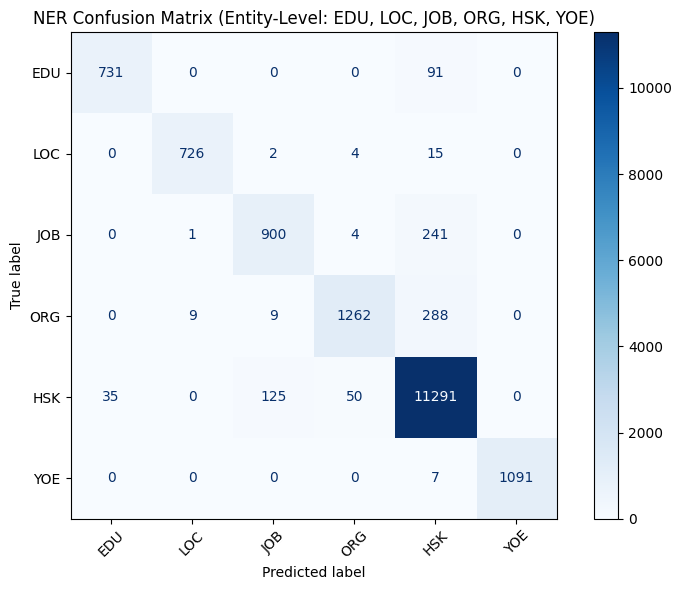

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# --- Step 1: Flatten sequences and strip BIO prefixes ---
def flatten_and_merge_tags(y_true_seq, y_pred_seq):
    y_true_flat, y_pred_flat = [], []
    for y_true, y_pred in zip(y_true_seq, y_pred_seq):
        for true_tag, pred_tag in zip(y_true, y_pred):
            y_true_flat.append(true_tag.split('-')[-1] if true_tag != 'O' else 'O')
            y_pred_flat.append(pred_tag.split('-')[-1] if pred_tag != 'O' else 'O')
    return y_true_flat, y_pred_flat

y_true_flat, y_pred_flat = flatten_and_merge_tags(y_true_tags, y_pred_tags)

# --- Step 2: Define target entity labels ---
labels = ['EDU', 'LOC', 'JOB', 'ORG', 'HSK', 'YOE']

# --- Step 3: Filter only the tags of interest (ignore 'O') ---
filtered_true = [t for t, p in zip(y_true_flat, y_pred_flat) if t in labels]
filtered_pred = [p for t, p in zip(y_true_flat, y_pred_flat) if t in labels]

# --- Step 4: Compute and display confusion matrix ---
cm = confusion_matrix(filtered_true, filtered_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(include_values=True, cmap='Blues', xticks_rotation=45, ax=ax, values_format='.0f')
plt.title("NER Confusion Matrix (Entity-Level: EDU, LOC, JOB, ORG, HSK, YOE)")
plt.tight_layout()
plt.show()
